In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def reloadImg():
    return cv2.imread('../../data/ex2.jpg')

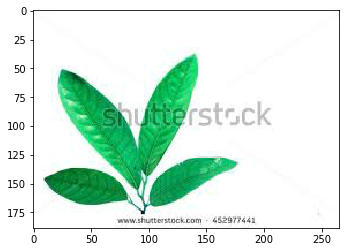

In [3]:
leaf_cascade = cv2.CascadeClassifier('trained_1/cascade.xml')
#eye_cascade = cv2.CascadeClassifier('D:/Users/703195115/HeRe/personal data/Study/practice/count_no_of_leaves_frm_image/resources/haarcascade_eye.xml')

img  = reloadImg()
plt.imshow(img)
plt.show()

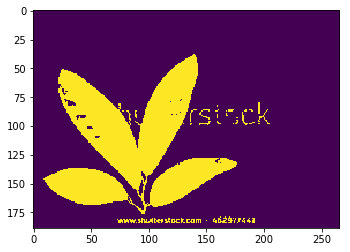

In [4]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(thresh)
plt.show()

In [5]:
leaves = leaf_cascade.detectMultiScale(thresh,1.3,3)
loc_lst = []
for pts in leaves:
    loc_lst.append((pts[0],pts[1]))
loc_lst

[(19, 132),
 (73, 87),
 (58, 149),
 (148, 76),
 (113, 100),
 (121, 7),
 (144, 61),
 (101, 34)]

In [6]:
# donot use this function , my python kernel was crashign due to this
#final_loc_lst2,weightss = cv2.groupRectangles(loc_lst,1,0.7)

In [7]:
threshold = 40

idx=0
final_loc_lst = []
final_loc_lst.append(loc_lst[0])

loc_lst.sort(key=lambda x: x[1], reverse=True)

if len(loc_lst)>1:
    while idx < (len(loc_lst)-1):
        try:
            diff0 = abs(loc_lst[idx+1][0] - loc_lst[idx][0])
            diff1 = abs(loc_lst[idx+1][1] - loc_lst[idx][1])
        except:
            print('err:',idx)
        if diff0 > threshold or  diff1 > threshold :
            final_loc_lst.append(loc_lst[idx+1])
        idx += 1

    #print(final_loc_lst)    
    print('=======================================================')
    if len(final_loc_lst) > 1:  
        final_loc_lst.sort(key=lambda x: x[0], reverse=True)
        final_loc_lst2 = []
        final_loc_lst2.append(final_loc_lst[0])
        idx = 0
    
        while idx < (len(final_loc_lst)-1):
            try:
                diff0 = abs(final_loc_lst[idx+1][0] - final_loc_lst[idx][0])
                diff1 = abs(final_loc_lst[idx+1][1] - final_loc_lst[idx][1])
            except:
                print('err:',idx)
            print(final_loc_lst[idx+1],' - ',final_loc_lst[idx], ' ', diff0, ' ', diff1,' ', (diff0 > threshold), ' ', diff1 > threshold, ' ', (diff0 > threshold or  diff1 > threshold ))
            if diff0 > threshold or  diff1 > threshold :
                final_loc_lst2.append(final_loc_lst[idx+1])
            idx += 1    
            

print(final_loc_lst2)

(113, 100)  -  (148, 76)   35   24   False   False   False
(101, 34)  -  (113, 100)   12   66   False   True   True
(19, 132)  -  (101, 34)   82   98   True   True   True
[(148, 76), (101, 34), (19, 132)]


no. of leaves: 3


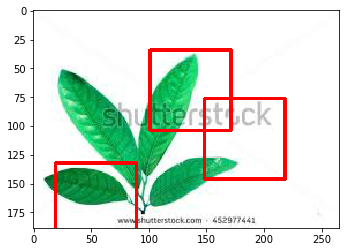

In [8]:
img  = reloadImg()

cnt=0
for (x,y) in final_loc_lst2:
    cv2.rectangle(img, (x,y), (x+70, y+70), (255,0,0),2 )
    cnt+=1
print('no. of leaves:',cnt)

plt.imshow(img)
plt.show()